# Hockey Analytics with the Stattleship API

__@BrockTibert__    

__Feburary 2016__

<hr/>

# Outline

1.  Introduction and Setup
2.  Getting Started with `R`
3.  Exploring the API
4.  Deeper dive
5.  Plotting
6.  Cluster the NHL Players  
7.  Scoring Plays  

# remaining

4, others

<hr/>

# Setup

Before we get started a few helpful resources:


### _Get your API_

To use the API, you need a token.  Get yours at [www.stattleship.com](https://stattleship.com/)


### _Explore what is possible_

1.  Take a look at [the playbook](http://playbook.stattleship.com/)

2.  You can also look at other code samples at http://developers.stattleship.com/#introduction

### _Github Development_

Check out the Github repo at https://github.com/stattleship

### API Access

It's a `REST` API, so getting data is fairly straightforward for most programming languages and the command line and `curl`.  But to make it easier, we have been working on a few wrappers in common languages.

-  [Ruby](https://github.com/stattleship/stattleship-ruby)  
-  [R](https://github.com/stattleship/stattleship-r)  
-  [Python](https://github.com/stattleship/stattleship-python)  


<hr/>

# Getting Started with R

Some requirements:

1.  `R`, which can be downloaded at https://cran.r-project.org/
2.  You need your API token, which you can get as described above.  

I am using a jupyter notebook for this talk, but most of the time you would probably want to use __Rstudio__ as your IDE.  I highly recommend downloading it at https://www.rstudio.com/.



## Install the R Package for Stattleship

To install the R wrapper for the Stattleship API, you will need the devtools package.  From the R REPL, type:

```
install.packages("devtools")
```

It may ask you for a mirror if you are not using `RStudio`, but simply select one that is closest to you.

Once `devtools` is good to go, you can install our R package by:

```
devtools::install_github("stattleship/stattleship-r")
```

You should be good to go.  If you have trouble with this, let us know, and we should be able to help you out.

Below, I will use a few other packages as well.  They are pretty helpful to have installed for everday R coding.

```
install.packages("dplyr")
install.packages("stringr")
install.packages("lubridate")
install.packages("ggplot2")
install.packages("tidyr")
```

<hr/>

# Explore the API

_Let's get started ..._

In [189]:
## factors are the devil
options(stringsAsFactors = FALSE)

## install some packages
library(stattleshipR)
suppressPackageStartupMessages(library("dplyr"))
library("lubridate")
library("stringr")
library("ggplot2")
library("tidyr")


In [106]:
## to access the API, you need to set your token
set_token(Sys.getenv("STATTLE_TOKEN"))

Above, I set my token with an `environment variable`, butyou could have set the token just as easily by:

```
set_token("YourTokenGoesHere")
```

I just prefer to set my API tokens as environment variables on my system so I don't have to type them out each time.  

For more help on R Environment variables, poke around for help on `.Reviron` files, which is simply a text file of commands that R reads in at startup.  I keep this in my home directory `~`.

## Helpers

Out-of-the-box, there are a few helper functions that make it easy to get started.

### Teams

In [3]:
## lets pull down all of the teams
teams <- hockey_teams()

[1] "Making initial API request"


In [4]:
## what do we have
class(teams)

[1] "data.frame"

In [5]:
## what are the columns of data
colnames(teams)

[1] "id"          "created_at"  "updated_at"  "color"       "colors"     
 [6] "location"    "name"        "nickname"    "slug"        "division_id"
[11] "league_id"

In [6]:
## lets look at the first few rows of data
head(teams, 3)

,id,created_at,updated_at,color,colors,location,name,nickname,slug,division_id,league_id
1,0e39b5fe-bbac-4488-8a4c-6556fa1fff88,2015-11-28T22:33:56-05:00,2016-01-15T10:00:26-05:00,000000,"000000, 91764B, EF5225",Anaheim,Anaheim,Ducks,nhl-ana,11740eea-c575-44e9-b4f5-a80805703ad0,48803e9e-c4ec-414a-a85d-9abfa6e9cfd9
2,06bab022-21a6-4999-b7a1-fe569971c68a,2015-11-28T22:33:56-05:00,2016-01-15T10:00:26-05:00,841F27,"841F27, 000000, EFE1C6",Arizona,Arizona,Coyotes,nhl-ari,11740eea-c575-44e9-b4f5-a80805703ad0,48803e9e-c4ec-414a-a85d-9abfa6e9cfd9
3,89296250-9fd4-4c7e-a21d-5e0f1ff20250,2016-01-03T21:19:49-05:00,2016-01-03T21:19:49-05:00,NA,,Atlantic,Atlantic,All-Stars,atl,15ca4e46-2b49-4f37-84ea-befb62de28c5,48803e9e-c4ec-414a-a85d-9abfa6e9cfd9


A few notes about some really helpful conventions:

## _Quick Tip_

Teams, players, and games have slugs.  They take the form of:

- `nhl-bos`  
- `nhl-ryan-spooner`
- `nhl-2015-2016-ott-bos-2016-04-9-1230`

Slugs will help you as you dive into your own ideas and explore the API.

### Games


In [111]:
## The functions are documented
?hockey_games

hockey_games {stattleshipR},R Documentation
league,"character. The hockey league to retrieve. Currently only the NHL is supported, and is the default."
team_id,"character. The team id, can be in the form of the slug ""nhl-bos"". Default is the Boston Bruins, nhl-bos."
verbose,logical. TRUE will print messages to the console. Default is TRUE.


In [112]:
## Get all of the B's regular season games for the season
bos_games <- hockey_games()

[1] "Making initial API request"
[1] "Retrieving results from page 2 of 3"
[1] "Retrieving results from page 3 of 3"


In [113]:
## what do we have
dim(bos_games)

[1] 82 36

In [115]:
colnames(bos_games)
head(bos_games, 3)

[1] "id"                 "created_at"         "updated_at"        
 [4] "at_neutral_site"    "attendance"         "away_team_outcome" 
 [7] "away_team_score"    "daytime"            "duration"          
[10] "ended_at"           "home_team_outcome"  "home_team_score"   
[13] "interval"           "interval_number"    "interval_type"     
[16] "label"              "name"               "on"                
[19] "score"              "score_differential" "scoreline"         
[22] "slug"               "started_at"         "temperature"       
[25] "temperature_unit"   "timestamp"          "title"             
[28] "weather_conditions" "wind_direction"     "wind_speed"        
[31] "wind_speed_unit"    "home_team_id"       "away_team_id"      
[34] "winning_team_id"    "season_id"          "venue_id"

,id,created_at,updated_at,at_neutral_site,attendance,away_team_outcome,away_team_score,daytime,duration,ended_at,ellip.h,title,weather_conditions,wind_direction,wind_speed,wind_speed_unit,home_team_id,away_team_id,winning_team_id,season_id,venue_id
1,5f17815e-d3c4-4b83-a9dc-12bb3e91c6d0,2016-01-06T03:17:52-05:00,2016-01-06T03:17:52-05:00,FALSE,0,undecided,0,FALSE,NA,NA,⋯,Senators vs Bruins,NA,NA,NA,NA,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb,42add1c3-7eed-4356-bd0b-cc3aa88693e8,NA,301759de-976d-4daa-a194-cacea1dc02ca,5c501c14-50d1-4c1e-8214-e729ed78615c
2,3f6c41cc-2a0d-44b0-a5bc-aaac9732b104,2016-01-06T03:17:51-05:00,2016-01-06T03:17:51-05:00,FALSE,0,undecided,0,FALSE,NA,NA,⋯,Red Wings vs Bruins,NA,NA,NA,NA,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb,c2a7d98a-fa2c-446e-9682-a8949854023e,NA,301759de-976d-4daa-a194-cacea1dc02ca,5c501c14-50d1-4c1e-8214-e729ed78615c
3,e82981b4-b953-4f98-9190-396c4bc63ad6,2016-01-06T03:17:51-05:00,2016-01-06T03:17:51-05:00,FALSE,0,undecided,0,FALSE,NA,NA,⋯,Hurricanes vs Bruins,NA,NA,NA,NA,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb,b0c4bd8e-fba7-4374-87d2-68bd4ab20875,NA,301759de-976d-4daa-a194-cacea1dc02ca,5c501c14-50d1-4c1e-8214-e729ed78615c


### Players

In [116]:
bos_players <- hockey_players()

[1] "Making initial API request"
[1] "Retrieving results from page 2 of 2"


In [118]:
colnames(players)
head(players, 3)

[1] "id"                    "created_at"            "updated_at"           
 [4] "active"                "defensive"             "first_name"           
 [7] "handedness"            "height"                "unit_of_height"       
[10] "last_name"             "name"                  "offensive"            
[13] "position_abbreviation" "position_name"         "salary"               
[16] "humanized_salary"      "salary_currency"       "school"               
[19] "slug"                  "sport"                 "weight"               
[22] "unit_of_weight"        "years_of_experience"   "league_id"            
[25] "playing_position_id"   "team_id"

,id,created_at,updated_at,active,defensive,first_name,handedness,height,unit_of_height,last_name,ellip.h,salary_currency,school,slug,sport,weight,unit_of_weight,years_of_experience,league_id,playing_position_id,team_id
1,b7a43a75-6755-495b-8508-59610c46f4b5,2016-01-06T01:55:20-05:00,2016-01-06T03:19:23-05:00,FALSE,FALSE,Noel,right,70,inches,Acciari,⋯,USD,NA,nhl-noel-acciari,hockey,207,pounds,0,48803e9e-c4ec-414a-a85d-9abfa6e9cfd9,a0248bb6-90aa-40e4-b849-70d257ed45d3,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb
2,0de1287c-5d40-472f-b896-5ec662e15917,2016-01-06T01:53:59-05:00,2016-01-06T03:19:23-05:00,FALSE,FALSE,Linus,left,73,inches,Arnesson,⋯,USD,NA,nhl-linus-arnesson,hockey,188,pounds,1,48803e9e-c4ec-414a-a85d-9abfa6e9cfd9,d3a3ddfb-4a36-4ae1-964b-9d2deadba761,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb
3,d8223e14-abb2-45d0-b8a4-5a33f261d0f4,2016-01-06T01:31:52-05:00,2016-02-01T21:38:15-05:00,TRUE,FALSE,Matt,left,72,inches,Beleskey,⋯,USD,NA,nhl-matt-beleskey,hockey,203,pounds,8,48803e9e-c4ec-414a-a85d-9abfa6e9cfd9,4329a9bc-8f07-4c48-8e19-b142678e68c6,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb


### Even Injuries

In [123]:
## get the injuries
bos_injuries <- hockey_injuries(team_id = "nhl-bos")

[1] "Making initial API request"


In [124]:
dim(bos_injuries)

[1]  9 12

In [121]:
colnames(bos_injuries)

[1] "id"                "created_at"        "updated_at"       
 [4] "location_name"     "started_on"        "status_updated_at"
 [7] "note"              "status"            "status_label"     
[10] "player_id"         "season_id"         "team_id"

In [127]:
## grab a few key columns and print
select(bos_injuries, started_on, location_name, note, status) %>% head(3)

,started_on,location_name,note,status
1,2016-01-26,Heart,Gustavsson has been placed on the injured reserve list due to an elevated heart rate. He has resumed skating and remains without a timetable for a return.,I-R
2,2016-01-05,Concussion,McQuaid was placed on injured reserve with a possible concussion. He has resumed skating at practice and remains without a definitive return timetable.,I-R
3,2016-01-25,Undisclosed,Rask missed the last game due to an undisclosed injury and is questionable to start Monday against the Flyers.,questionable





We will be doing much more with helpers in the coming weeks, but the real fun is when you play around with the results at a more granular level. In the meantime, I am going to source a few helpers that I will use next.  These are not part of the R package, but may be in the future.

In [139]:
## source some helper functions
## the key function is parse_stattle
devtools::source_url("http://bit.ly/1OY151g")

SHA-1 hash of file is fcaa9c8cd35809b05e2bd2c6655c6280bff2f6df


<hr/>

# A Deeper Dive into the API

The real workhorse of the R package right now is `ss_get_result`.  

This function allows us to interface with the endpoints at a granular level

In [130]:
?ss_get_result

ss_get_result {stattleshipR},R Documentation
sport,"character. The sport, such as hockey, basketball, football. Default is hockey."
league,"character. NHL, NBA, NFL, etc. Default is nhl."
ep,character. The endpoint. Default is teams.
query,list. A list that defines the query parameters. Default is empty list.
version,numeric. The API version. Current version is 1 and is the default value.
walk,"logical. If TRUE, walks through and returns all results if there is more than one page of results. Default is FALSE."
page,numeric. The page number to request. Default is NA.
verbose,"logical. For debugging, prints status messages to the console, which can be helpful for walking through results. Default is TRUE."


In [133]:
## going back to Boston's games, we can filter the results
## below I am going to pull all of the finished bruins regular seasons gmes
qbody <- list(team_id = "nhl-bos", interval_type="regularseason", status="ended")
bos_games <- ss_get_result(ep="games", query=qbody, walk=TRUE)

[1] "Making initial API request"
[1] "Retrieving results from page 2 of 2"


In [134]:
## the data are returned in lists to allow you more flexibility
length(bos_games)

[1] 2

In [136]:
names(bos_games)

NULL

When we set `walk=TRUE`, we are paging through the results of the API.  Each page of data is returned as en entry in the R list.

In [137]:
class(bos_games)

[1] "list"

In [138]:
names(bos_games[[1]])

[1] "home_teams"    "leagues"       "away_teams"    "winning_teams"
[5] "seasons"       "venues"        "games"

The above represent the data that come back to us. While we could use `do.call` to parse things out, one of the helper functions loaded above makes things even easier.  It is __parse_stattle()__.  We can use the function to get the entry across all of the pages.

In [141]:
## it takes the raw results, and the API entry
games <- parse_stattle(bos_games, "games")

In [142]:
## what comes back?
class(games)

[1] "data.frame"

In [143]:
dim(games)

[1] 49 36

In [144]:
colnames(games)

[1] "id"                 "created_at"         "updated_at"        
 [4] "at_neutral_site"    "attendance"         "away_team_outcome" 
 [7] "away_team_score"    "daytime"            "duration"          
[10] "ended_at"           "home_team_outcome"  "home_team_score"   
[13] "interval"           "interval_number"    "interval_type"     
[16] "label"              "name"               "on"                
[19] "score"              "score_differential" "scoreline"         
[22] "slug"               "started_at"         "temperature"       
[25] "temperature_unit"   "timestamp"          "title"             
[28] "weather_conditions" "wind_direction"     "wind_speed"        
[31] "wind_speed_unit"    "home_team_id"       "away_team_id"      
[34] "winning_team_id"    "season_id"          "venue_id"

In [145]:
head(games, 3)

,id,created_at,updated_at,at_neutral_site,attendance,away_team_outcome,away_team_score,daytime,duration,ended_at,ellip.h,title,weather_conditions,wind_direction,wind_speed,wind_speed_unit,home_team_id,away_team_id,winning_team_id,season_id,venue_id
1,c10e1dc8-455a-4592-b4d4-0fa24a420aa2,2016-01-06T03:17:35-05:00,2016-01-27T02:03:08-05:00,FALSE,17565,win,6,FALSE,9600,2016-01-26T21:49:32-05:00,⋯,Ducks vs Bruins,NA,NA,NA,NA,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb,0e39b5fe-bbac-4488-8a4c-6556fa1fff88,0e39b5fe-bbac-4488-8a4c-6556fa1fff88,301759de-976d-4daa-a194-cacea1dc02ca,5c501c14-50d1-4c1e-8214-e729ed78615c
2,91aa973c-fe46-4125-b32c-948af989336c,2016-01-06T03:17:35-05:00,2016-01-25T22:03:25-05:00,FALSE,19738,win,3,FALSE,9360,2016-01-25T21:45:53-05:00,⋯,Bruins vs Flyers,NA,NA,NA,NA,c94be617-bf0c-4516-82b8-782d7aa783ae,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb,301759de-976d-4daa-a194-cacea1dc02ca,22d7334c-2387-45e3-82b1-03ec518df92e
3,9f6108e5-41d1-4a37-a8a1-72e3c71b9387,2016-01-06T03:17:34-05:00,2016-01-23T22:17:24-05:00,FALSE,17565,shootout_loss,2,FALSE,9840,2016-01-23T21:55:33-05:00,⋯,Blue Jackets vs Bruins,NA,NA,NA,NA,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb,54410a6b-c9e0-443e-a4cf-b3e22f2cbb75,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb,301759de-976d-4daa-a194-cacea1dc02ca,5c501c14-50d1-4c1e-8214-e729ed78615c


# Game Logs


![friends](https://33.media.tumblr.com/047a3fb868caa569ae2432c083f2fa7c/tumblr_inline_n6ngg3PFX51szj4b9.gif)

In [154]:
## teams have game logs.  Lets get the Bruins
qbody <- list(team_id = "nhl-bos", interval_type="regularseason", status="ended")
gl_raw <- ss_get_result(ep="team_game_logs", query=qbody, walk=TRUE)

[1] "Making initial API request"
[1] "Retrieving results from page 2 of 2"


In [156]:
logs <- parse_stattle(gl_raw, "team_game_logs")

In [158]:
colnames(logs)

[1] "id"                                  
 [2] "created_at"                          
 [3] "updated_at"                          
 [4] "home_team_outcome"                   
 [5] "home_team_score"                     
 [6] "away_team_outcome"                   
 [7] "away_team_score"                     
 [8] "team_outcome"                        
 [9] "team_score"                          
[10] "faceoff_total_losses"                
[11] "faceoff_total_wins"                  
[12] "games_lost"                          
[13] "games_lost_overtime"                 
[14] "games_lost_shootout"                 
[15] "games_tied"                          
[16] "games_won"                           
[17] "games_won_overtime"                  
[18] "games_won_shootout"                  
[19] "goalie_assists"                      
[20] "goalie_goals_against"                
[21] "goalie_goals_against_average"        
[22] "goalie_goals_scored"                 
[23] "goalie_hits"                         
[24] "goalie_penalty_minutes"              
[25] "goalie_points_power_play"            
[26] "goalie_points_short_handed"          
[27] "goalie_saves"                        
[28] "goalie_shots_against"                
[29] "goalie_time_on_ice_power_play_secs"  
[30] "goalie_time_on_ice_secs"             
[31] "goalie_time_on_ice_short_handed_secs"
[32] "goals"                               
[33] "goals_empty_net"                     
[34] "goals_overtime"                      
[35] "goals_overtime_1"                    
[36] "goals_overtime_2"                    
[37] "goals_overtime_3"                    
[38] "goals_period_1"                      
[39] "goals_period_2"                      
[40] "goals_period_3"                      
[41] "goals_power_play"                    
[42] "goals_shootout"                      
[43] "penalties"                           
[44] "penalty_minutes"                     
[45] "player_assists"                      
[46] "player_blocked_shots"                
[47] "player_game_winning_goals"           
[48] "player_hits"                         
[49] "player_plus_minus"                   
[50] "player_points"                       
[51] "player_points_power_play"            
[52] "player_points_short_handed"          
[53] "player_time_on_ice_power_play_secs"  
[54] "player_time_on_ice_short_handed_secs"
[55] "power_plays"                         
[56] "shootouts_attempted"                 
[57] "shootouts_scored"                    
[58] "shots"                               
[59] "shots_overtime"                      
[60] "shots_overtime_1"                    
[61] "shots_overtime_2"                    
[62] "shots_overtime_3"                    
[63] "shots_period_1"                      
[64] "shots_period_2"                      
[65] "shots_period_3"                      
[66] "shutouts"                            
[67] "total_play_time"                     
[68] "game_id"                             
[69] "opponent_id"                         
[70] "team_id"

In [159]:
head(logs, 3)

,id,created_at,updated_at,home_team_outcome,home_team_score,away_team_outcome,away_team_score,team_outcome,team_score,faceoff_total_losses,ellip.h,shots_overtime_2,shots_overtime_3,shots_period_1,shots_period_2,shots_period_3,shutouts,total_play_time,game_id,opponent_id,team_id
1,9cab0a21-42d9-42e8-b7b9-fcec88a26199e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb,2016-01-06T01:36:13-05:00,2016-01-06T02:06:52-05:00,win,6,loss,0,win,6,35,⋯,NA,NA,9,11,7,1,3600,9cab0a21-42d9-42e8-b7b9-fcec88a26199,06bab022-21a6-4999-b7a1-fe569971c68a,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb
2,c4f3c63a-bcd3-4323-8a41-e914a0edff55e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb,2016-01-06T01:31:49-05:00,2016-01-06T02:02:47-05:00,loss,2,win,6,loss,2,30,⋯,NA,NA,14,10,7,NA,3600,c4f3c63a-bcd3-4323-8a41-e914a0edff55,157c2242-afa5-499d-906d-6a992927e58d,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb
3,10ff7e06-98f1-4aba-abbc-e97f7914e104e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb,2016-01-06T01:37:29-05:00,2016-01-06T02:08:06-05:00,loss,1,win,3,win,3,32,⋯,NA,NA,13,10,11,NA,3600,10ff7e06-98f1-4aba-abbc-e97f7914e104,efd97f2d-fe29-4fe8-9f01-cfad8488c0c2,e9d7bcb5-6723-4ca9-b1d9-1ccd026be1cb


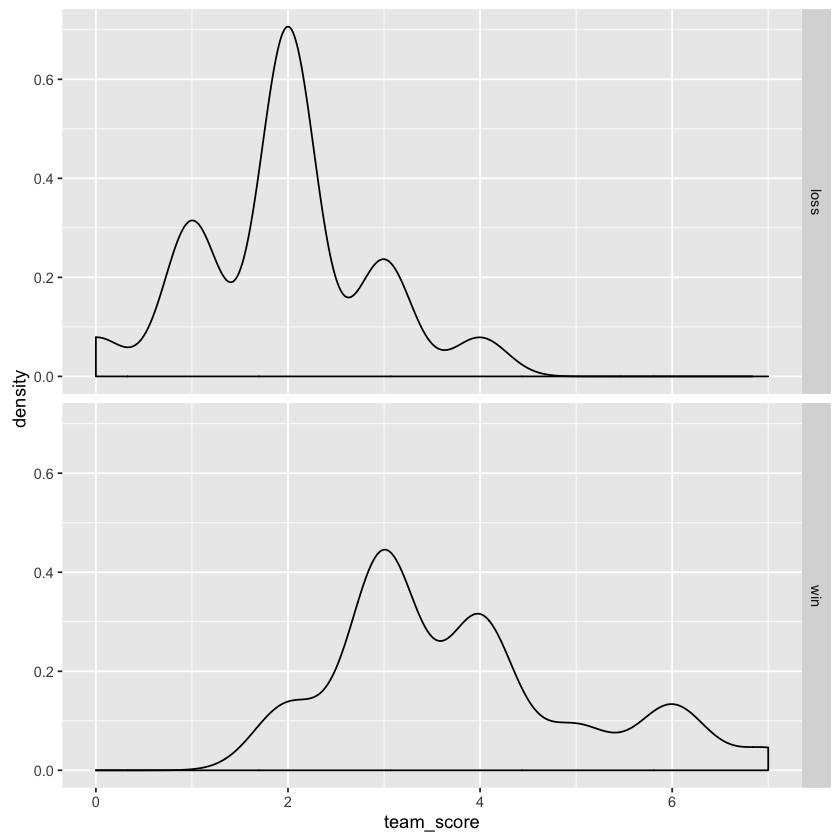

In [173]:
## plot goals scored by wins and losses -- excludes overtime
filter(logs, team_outcome %in% c("win","loss")) %>% 
 ggplot(aes(team_score)) + geom_density() + facet_grid(team_outcome ~ .)

In [175]:
## players also have game logs
qbody <- list(player_id = "nhl-patrick-kane", interval_type="regularseason", status="ended")
gl_raw <- ss_get_result(ep="game_logs", query=qbody, walk=TRUE)

[1] "Making initial API request"
[1] "Retrieving results from page 2 of 2"


In [180]:
kane_logs <- parse_stattle(gl_raw, "game_logs")
games <- parse_stattle(gl_raw, "games")

In [181]:
colnames(kane_logs)
colnames(games)

[1] "id"                             "created_at"                    
 [3] "updated_at"                     "game_played"                   
 [5] "game_started"                   "home_team_outcome"             
 [7] "home_team_score"                "away_team_outcome"             
 [9] "away_team_score"                "team_outcome"                  
[11] "team_score"                     "assists"                       
[13] "blocked_shots"                  "faceoffs_won"                  
[15] "faceoffs_lost"                  "faceoff_win_percentage"        
[17] "goals"                          "goals_power_play"              
[19] "goals_short_handed"             "hits"                          
[21] "penalty_minutes"                "plus_minus"                    
[23] "points"                         "points_power_play"             
[25] "shifts"                         "shooting_pct"                  
[27] "shots"                          "takeaways"                     
[29] "time_on_ice_secs"               "time_on_ice_even_strength_secs"
[31] "time_on_ice_power_play_secs"    "time_on_ice_short_handed_secs" 
[33] "assists_power_play"             "assists_short_handed"          
[35] "game_winning_goals"             "goals_overtime"                
[37] "goals_period_1"                 "goals_period_2"                
[39] "goals_period_3"                 "points_short_handed"           
[41] "shootouts_attempted"            "shootouts_scored"              
[43] "game_id"                        "player_id"                     
[45] "team_id"                        "opponent_id"

[1] "id"                 "created_at"         "updated_at"        
 [4] "at_neutral_site"    "attendance"         "away_team_outcome" 
 [7] "away_team_score"    "daytime"            "duration"          
[10] "ended_at"           "home_team_outcome"  "home_team_score"   
[13] "interval"           "interval_number"    "interval_type"     
[16] "label"              "name"               "on"                
[19] "score"              "score_differential" "scoreline"         
[22] "slug"               "started_at"         "temperature"       
[25] "temperature_unit"   "timestamp"          "title"             
[28] "weather_conditions" "wind_direction"     "wind_speed"        
[31] "wind_speed_unit"    "home_team_id"       "away_team_id"      
[34] "winning_team_id"    "season_id"          "venue_id"

In [183]:
## some quick cleanup to merge the game data onto Kane's logs
names(games)[1] <- "game_id"
games <- select(games, game_id, attendance, started_at)
kane_logs <- left_join(kane_logs, games)

Joining by: "game_id"


In [199]:
## prep the data for a point streak
kane_logs <- arrange(kane_logs, started_at)
kane_logs <- replace_na(kane_logs, replace = list(points=0))
kane_logs <- mutate(kane_logs, gameid = 1:n())

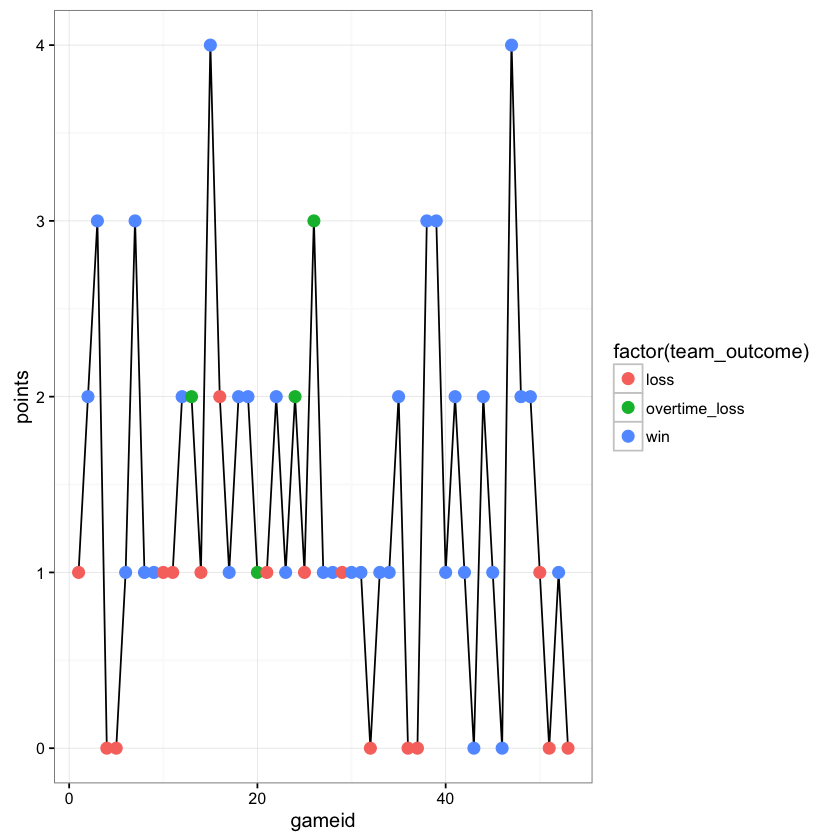

In [225]:
ggplot(kane_logs, aes(x=gameid, y=points)) + 
 geom_line() + 
 geom_point(aes(colour = factor(team_outcome)), size=3) + 
 theme_bw()

# Stats Endpoint

We can get data for an individual stat.  Let's look at helpers.


In [249]:
qbody <- list(player_id = "nhl-erik-karlsson", 
              interval_type="regularseason", stat="assists", type="hockey_offensive_stat")
stat_raw <- ss_get_result(ep="stats", query=qbody, walk=TRUE)



[1] "Making initial API request"
[1] "Retrieving results from page 2 of 2"


In [260]:
helpers <- parse_stattle(stat_raw, "stats")
games <- parse_stattle(stat_raw, "games")
games <- select(games, id, started_at)
names(games)[1] <- "game_id"
helpers <- left_join(helpers, games)
helpers <- replace_na(helpers, replace = list(stat=0))
helpers <- arrange(helpers, started_at)
helpers <- transform(helpers, gameid = 1:nrow(helpers))

Joining by: "game_id"


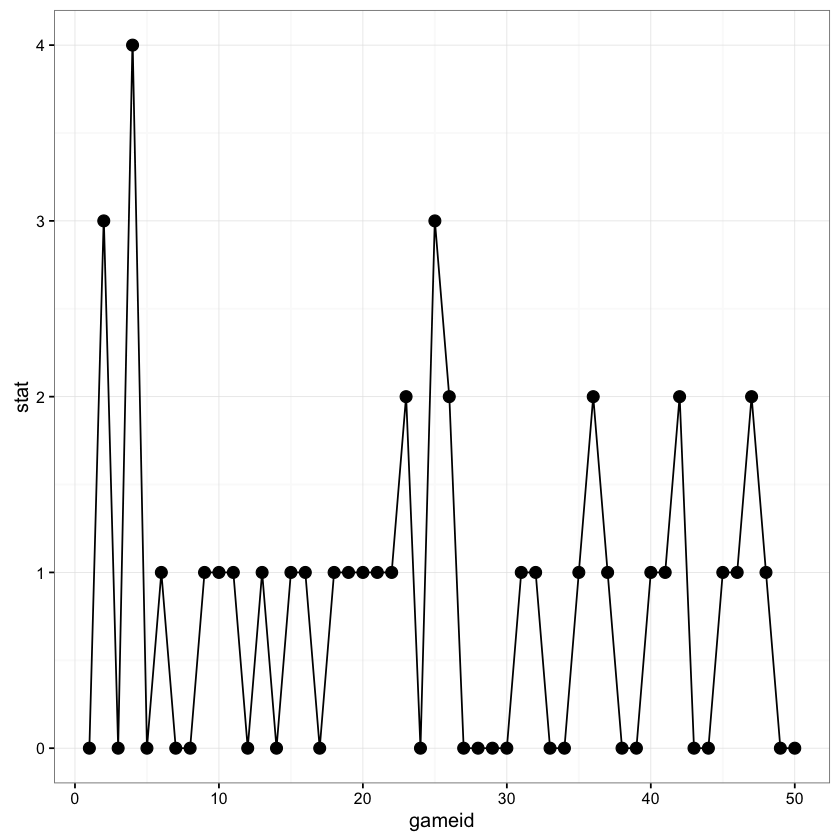

In [262]:
ggplot(helpers, aes(x=gameid, y=stat)) + 
 geom_line() + 
 geom_point(size=3) + 
 theme_bw()

<hr/>

# Total Stats

In addition to getting a stat across the games (for a player __or__ team), it's possible to get a total stat.  

Below, I want to dive into special teams play.

In [293]:
## a helper function for teams
devtools::source_url("http://bit.ly/1QXoKEX")

SHA-1 hash of file is 8f71568c0143039b5b8b832edcba2f8594edd6fc


In [301]:
## get the teams
teams <- hockey_teams()
## remove the allstar teams
teams <- filter(teams, !slug %in% c("atl", "metro", "pac", "cent"))

[1] "Making initial API request"


In [302]:
## keep the slugs as dataframe
teams <- select(teams, id, nickname, slug)

In [303]:
## get the powerplays, penalties, and some stats on special teams
get_tot_team_stats("power_plays", "hockey_team_stat", teams$slug, teams)
get_tot_team_stats("penalties", "hockey_team_stat", teams$slug, teams)
get_tot_team_stats("goals_power_play", "hockey_team_stat", teams$slug, teams)
get_tot_team_stats("player_points_power_play", "hockey_team_stat", teams$slug, teams)
get_tot_team_stats("player_points_short_handed", "hockey_team_stat", teams$slug, teams)


finished  nhl-ana 
finished  nhl-ari 
finished  nhl-bos 
finished  nhl-buf 
finished  nhl-cal 
finished  nhl-car 
finished  nhl-chi 
finished  nhl-col 
finished  nhl-clb 
finished  nhl-dal 
finished  nhl-det 
finished  nhl-edm 
finished  nhl-fla 
finished  nhl-la 
finished  nhl-min 
finished  nhl-mon 
finished  nhl-nas 
finished  nhl-nj 
finished  nhl-nyi 
finished  nhl-nyr 
finished  nhl-ott 
finished  nhl-phi 
finished  nhl-pit 
finished  nhl-sj 
finished  nhl-stl 
finished  nhl-tb 
finished  nhl-tor 
finished  nhl-van 
finished  nhl-was 
finished  nhl-win 


Joining by: "id"


finished  nhl-ana 
finished  nhl-ari 
finished  nhl-bos 
finished  nhl-buf 
finished  nhl-cal 
finished  nhl-car 
finished  nhl-chi 
finished  nhl-col 
finished  nhl-clb 
finished  nhl-dal 
finished  nhl-det 
finished  nhl-edm 
finished  nhl-fla 
finished  nhl-la 
finished  nhl-min 
finished  nhl-mon 
finished  nhl-nas 
finished  nhl-nj 
finished  nhl-nyi 
finished  nhl-nyr 
finished  nhl-ott 
finished  nhl-phi 
finished  nhl-pit 
finished  nhl-sj 
finished  nhl-stl 
finished  nhl-tb 
finished  nhl-tor 
finished  nhl-van 
finished  nhl-was 
finished  nhl-win 


Joining by: "id"


finished  nhl-ana 
finished  nhl-ari 
finished  nhl-bos 
finished  nhl-buf 
finished  nhl-cal 
finished  nhl-car 
finished  nhl-chi 
finished  nhl-col 
finished  nhl-clb 
finished  nhl-dal 
finished  nhl-det 
finished  nhl-edm 
finished  nhl-fla 
finished  nhl-la 
finished  nhl-min 
finished  nhl-mon 
finished  nhl-nas 
finished  nhl-nj 
finished  nhl-nyi 
finished  nhl-nyr 
finished  nhl-ott 
finished  nhl-phi 
finished  nhl-pit 
finished  nhl-sj 
finished  nhl-stl 
finished  nhl-tb 
finished  nhl-tor 
finished  nhl-van 
finished  nhl-was 
finished  nhl-win 


Joining by: "id"


finished  nhl-ana 
finished  nhl-ari 
finished  nhl-bos 
finished  nhl-buf 
finished  nhl-cal 
finished  nhl-car 
finished  nhl-chi 
finished  nhl-col 
finished  nhl-clb 
finished  nhl-dal 
finished  nhl-det 
finished  nhl-edm 
finished  nhl-fla 
finished  nhl-la 
finished  nhl-min 
finished  nhl-mon 
finished  nhl-nas 
finished  nhl-nj 
finished  nhl-nyi 
finished  nhl-nyr 
finished  nhl-ott 
finished  nhl-phi 
finished  nhl-pit 
finished  nhl-sj 
finished  nhl-stl 
finished  nhl-tb 
finished  nhl-tor 
finished  nhl-van 
finished  nhl-was 
finished  nhl-win 


Joining by: "id"


finished  nhl-ana 
finished  nhl-ari 
finished  nhl-bos 
finished  nhl-buf 
finished  nhl-cal 
finished  nhl-car 
finished  nhl-chi 
finished  nhl-col 
finished  nhl-clb 
finished  nhl-dal 
finished  nhl-det 
finished  nhl-edm 
finished  nhl-fla 
finished  nhl-la 
finished  nhl-min 
finished  nhl-mon 
finished  nhl-nas 
finished  nhl-nj 
finished  nhl-nyi 
finished  nhl-nyr 
finished  nhl-ott 
finished  nhl-phi 
finished  nhl-pit 
finished  nhl-sj 
finished  nhl-stl 
finished  nhl-tb 
finished  nhl-tor 
finished  nhl-van 
finished  nhl-was 
finished  nhl-win 


Joining by: "id"


In [305]:
dim(teams)

[1] 30  8

In [306]:
colnames(teams)

[1] "id"                         "nickname"                  
[3] "slug"                       "power_plays"               
[5] "penalties"                  "goals_power_play"          
[7] "player_points_power_play"   "player_points_short_handed"

In [307]:
summary(teams)

      id              nickname             slug            power_plays   
 Length:30          Length:30          Length:30          Min.   :127.0  
 Class :character   Class :character   Class :character   1st Qu.:143.5  
 Mode  :character   Mode  :character   Mode  :character   Median :154.0  
                                                          Mean   :153.1  
                                                          3rd Qu.:159.5  
                                                          Max.   :180.0  
   penalties     goals_power_play player_points_power_play
 Min.   :144.0   Min.   :21.00    Min.   : 60.00          
 1st Qu.:181.0   1st Qu.:25.25    1st Qu.: 71.50          
 Median :193.5   Median :28.00    Median : 81.50          
 Mean   :194.6   Mean   :28.83    Mean   : 83.07          
 3rd Qu.:212.5   3rd Qu.:32.75    3rd Qu.: 92.00          
 Max.   :247.0   Max.   :38.00    Max.   :111.00          
 player_points_short_handed
 Min.   : 0.000            
 1st Qu.: 3.0

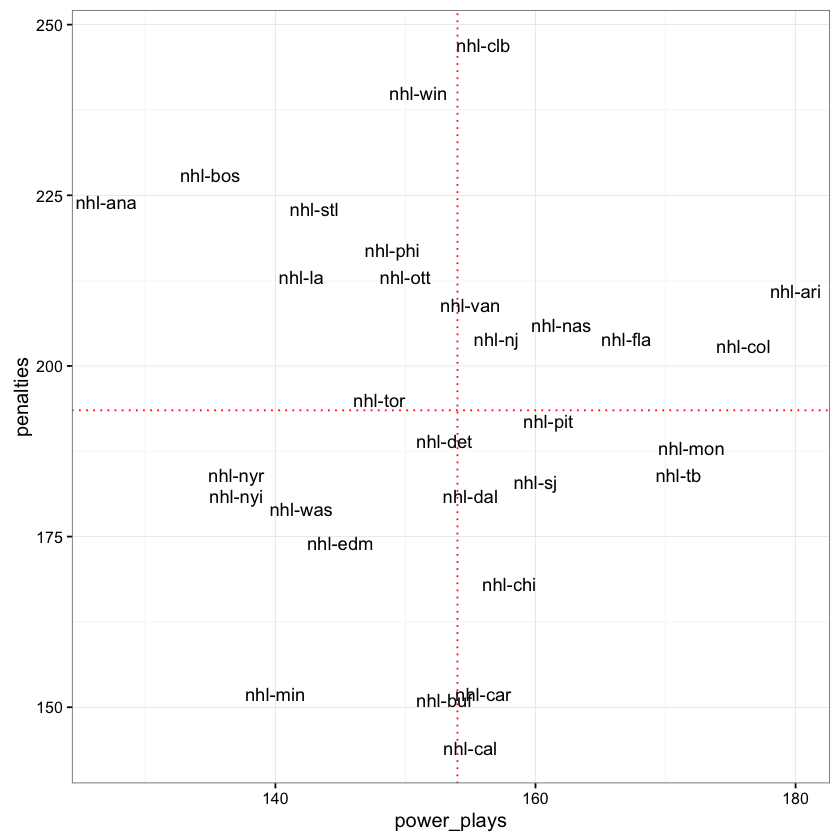

In [320]:
ggplot(teams, aes(x=power_plays, y=penalties, label=slug)) +
 geom_text() + 
 geom_hline(aes(yintercept=193.5), linetype="dotted", colour="red") +
 geom_vline(aes(xintercept=154), linetype="dotted", colour="red") + 
 theme_bw()

In [325]:
## best powerplays
teams <- transform(teams, pp_pct = goals_power_play / power_plays)
arrange(teams, desc(pp_pct)) %>% select(slug, pp_pct) %>% head(5)

,slug,pp_pct
1,nhl-was,0.2676056
2,nhl-bos,0.2592593
3,nhl-sj,0.225
4,nhl-buf,0.2156863
5,nhl-chi,0.2151899


In [334]:
## a super naive fit
lm(player_points_power_play ~ player_points_short_handed, teams)


Call:
lm(formula = player_points_power_play ~ player_points_short_handed, 
    data = teams)

Coefficients:
               (Intercept)  player_points_short_handed  
                   78.7699                      0.5859  


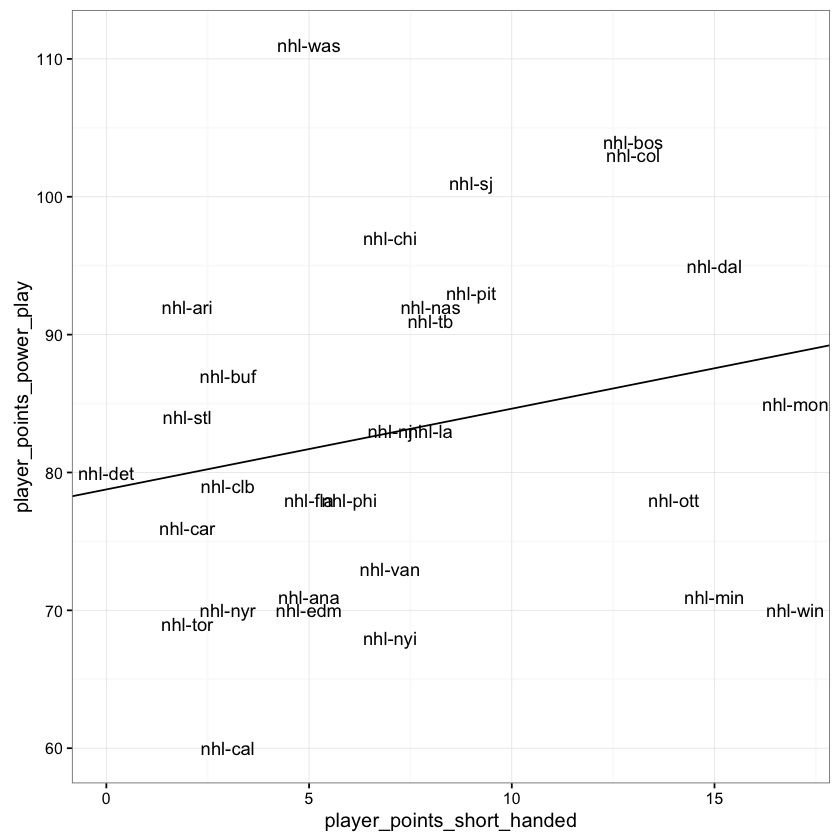

In [332]:
## put the fit line on 
ggplot(teams, aes(x=player_points_short_handed, y=player_points_power_play, label=slug)) +
 geom_text() + 
 geom_abline(intercept=78.7699, slope=0.5859) +
 theme_bw()

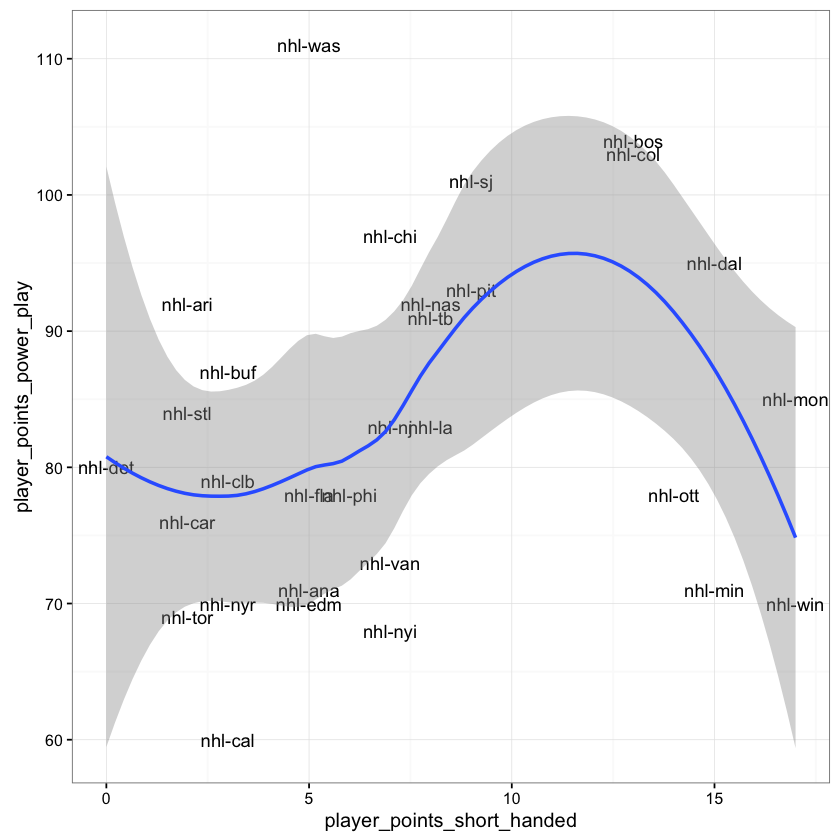

In [333]:
## smooth the pattern
ggplot(teams, aes(x=player_points_short_handed, y=player_points_power_play, label=slug)) +
 geom_text() + 
 geom_smooth() +
 theme_bw()

# Scoring Plays

# Scoring Plays or Penalty Plays

## Allstar Clustering

In [107]:
## load the other packages
library(googlesheets)

## and bring in the cached data for the post
load("allstar.rdata")

In [8]:
## source some helper functions
devtools::source_url("http://bit.ly/1OY151g")

SHA-1 hash of file is fcaa9c8cd35809b05e2bd2c6655c6280bff2f6df


In [10]:
## get the allstar roster from a google doc
key <- "12dUvvbAc5h7uH9GaJDiJolXaicY90OAe3cqBT8vjASo"
star <- gs_key(key)
roster <- gs_read(star, 
                  ws = "roster", 
                  range="A1:D45")
rm(key, star)

Authorization will not be used.
Worksheets feed constructed with public visibility
Accessing worksheet titled "roster"


In [12]:
## quick look at the roster
head(roster)

,player,pos,team,slug
1,Corey Perry,F,ANA,nhl-corey-perry
2,John Gibson,G,ANA,nhl-john-gibson
3,John Scott,F,ARI,nhl-john-scott
4,Patrice Bergeron,F,BOS,nhl-patrice-bergeron
5,Ryan O'Reilly,F,BUF,nhl-ryan-o-reilly
6,Justin Faulk,D,CAR,nhl-justin-faulk


In [25]:
## create the master allstar dataframe
allstar <- data.frame()


## get the games played
for (player in roster$slug) {
  x <- count_games(player)
  allstar <- bind_rows(allstar, x)
  cat("added ", player, "\n")
} 
rm(x, player)
allstar <- unique(allstar)

added  nhl-corey-perry 
added  nhl-john-gibson 
added  nhl-john-scott 
added  nhl-patrice-bergeron 
added  nhl-ryan-o-reilly 
added  nhl-justin-faulk 
added  nhl-brandon-saad 
added  nhl-mark-giordano 
added  nhl-johnny-gaudreau 
added  nhl-patrick-kane 
added  nhl-jonathan-toews 
added  nhl-matt-duchene 
added  nhl-jamie-benn 
added  nhl-tyler-seguin 
added  nhl-dylan-larkin 
added  nhl-taylor-hall 
added  nhl-aaron-ekblad 
added  nhl-jaromir-jagr 
added  nhl-roberto-luongo 
added  nhl-drew-doughty 
added  nhl-jonathan-quick 
added  nhl-devan-dubnyk 
added  nhl-p-k-subban 
added  nhl-cory-schneider 
added  nhl-roman-josi 
added  nhl-shea-weber 
added  nhl-pekka-rinne 
added  nhl-john-tavares 
added  nhl-ryan-mcdonagh 
added  nhl-erik-karlsson 
added  nhl-claude-giroux 
added  nhl-kris-letang 
added  nhl-evgeni-malkin 
added  nhl-brent-burns 
added  nhl-joe-pavelski 
added  nhl-vladimir-tarasenko 
added  nhl-steven-stamkos 
added  nhl-ben-bishop 
added  nhl-leo-komarov 
added  nhl-dani

In [26]:
## quick sanity check
head(allstar)

,id,name,slug,games_played
1,e4706cd9-0db1-4479-a20e-eb5899c4c5ff,Corey Perry,nhl-corey-perry,47
2,4d166e33-f47c-464b-99ba-e630e9103be6,John Gibson,nhl-john-gibson,26
3,d492496b-28e4-4877-9805-d2cfe6228767,John Scott,nhl-john-scott,12
4,02f9c885-da43-42dc-ad2c-bdda22cad2b6,Patrice Bergeron,nhl-patrice-bergeron,49
5,ad0afef3-b31c-4359-be83-322a248889b0,Ryan O'Reilly,nhl-ryan-o-reilly,50
6,2f669c70-65f0-4be0-9703-9d5540a63876,Justin Faulk,nhl-justin-faulk,51


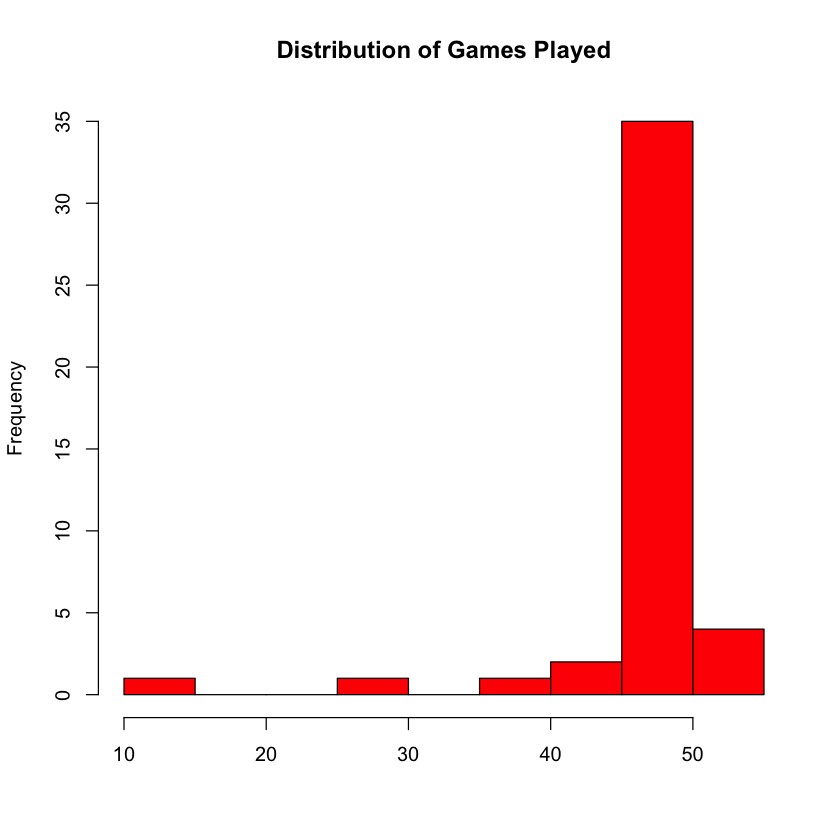

In [27]:
## histogram of games played
hist(allstar$games_played, col="red", main="Distribution of Games Played", xlab="")

In [28]:
## get the stats using the helper functions and the total_stats endpoing
get_tot_stat("goals", "hockey_offensive_stat", allstar$slug, allstar, parse_player=TRUE)
get_tot_stat("assists", "hockey_offensive_stat", allstar$slug, allstar)
get_tot_stat("shots", "hockey_offensive_stat", allstar$slug, allstar)
get_tot_stat("penalty_minutes", "hockey_player_stat", allstar$slug, allstar)
get_tot_stat("plus_minus", "hockey_player_stat", allstar$slug, allstar)
get_tot_stat("shifts", "hockey_player_stat", allstar$slug, allstar)
get_tot_stat("time_on_ice_even_strength_secs", "hockey_player_stat", allstar$slug, allstar)
get_tot_stat("time_on_ice_power_play_secs", "hockey_player_stat", allstar$slug, allstar)
get_tot_stat("time_on_ice_short_handed_secs", "hockey_player_stat", allstar$slug, allstar)
get_tot_stat("faceoff_win_percentage", "hockey_face_off_stat", allstar$slug, allstar)
get_tot_stat("blocked_shots", "hockey_defensive_stat", allstar$slug, allstar)
get_tot_stat("hits", "hockey_defensive_stat", allstar$slug, allstar)

finished  nhl-corey-perry 
finished  nhl-john-gibson 
finished  nhl-john-scott 
finished  nhl-patrice-bergeron 
finished  nhl-ryan-o-reilly 
finished  nhl-justin-faulk 
finished  nhl-brandon-saad 
finished  nhl-mark-giordano 
finished  nhl-johnny-gaudreau 
finished  nhl-patrick-kane 
finished  nhl-jonathan-toews 
finished  nhl-matt-duchene 
finished  nhl-jamie-benn 
finished  nhl-tyler-seguin 
finished  nhl-dylan-larkin 
finished  nhl-taylor-hall 
finished  nhl-aaron-ekblad 
finished  nhl-jaromir-jagr 
finished  nhl-roberto-luongo 
finished  nhl-drew-doughty 
finished  nhl-jonathan-quick 
finished  nhl-devan-dubnyk 
finished  nhl-p-k-subban 
finished  nhl-cory-schneider 
finished  nhl-roman-josi 
finished  nhl-shea-weber 
finished  nhl-pekka-rinne 
finished  nhl-john-tavares 
finished  nhl-ryan-mcdonagh 
finished  nhl-erik-karlsson 
finished  nhl-claude-giroux 
finished  nhl-kris-letang 
finished  nhl-evgeni-malkin 
finished  nhl-brent-burns 
finished  nhl-joe-pavelski 
finished  nhl-v

Joining by: "id"


finished  nhl-corey-perry 
finished  nhl-john-gibson 
finished  nhl-john-scott 
finished  nhl-patrice-bergeron 
finished  nhl-ryan-o-reilly 
finished  nhl-justin-faulk 
finished  nhl-brandon-saad 
finished  nhl-mark-giordano 
finished  nhl-johnny-gaudreau 
finished  nhl-patrick-kane 
finished  nhl-jonathan-toews 
finished  nhl-matt-duchene 
finished  nhl-jamie-benn 
finished  nhl-tyler-seguin 
finished  nhl-dylan-larkin 
finished  nhl-taylor-hall 
finished  nhl-aaron-ekblad 
finished  nhl-jaromir-jagr 
finished  nhl-roberto-luongo 
finished  nhl-drew-doughty 
finished  nhl-jonathan-quick 
finished  nhl-devan-dubnyk 
finished  nhl-p-k-subban 
finished  nhl-cory-schneider 
finished  nhl-roman-josi 
finished  nhl-shea-weber 
finished  nhl-pekka-rinne 
finished  nhl-john-tavares 
finished  nhl-ryan-mcdonagh 
finished  nhl-erik-karlsson 
finished  nhl-claude-giroux 
finished  nhl-kris-letang 
finished  nhl-evgeni-malkin 
finished  nhl-brent-burns 
finished  nhl-joe-pavelski 
finished  nhl-v

Joining by: "id"


finished  nhl-corey-perry 
finished  nhl-john-gibson 
finished  nhl-john-scott 
finished  nhl-patrice-bergeron 
finished  nhl-ryan-o-reilly 
finished  nhl-justin-faulk 
finished  nhl-brandon-saad 
finished  nhl-mark-giordano 
finished  nhl-johnny-gaudreau 
finished  nhl-patrick-kane 
finished  nhl-jonathan-toews 
finished  nhl-matt-duchene 
finished  nhl-jamie-benn 
finished  nhl-tyler-seguin 
finished  nhl-dylan-larkin 
finished  nhl-taylor-hall 
finished  nhl-aaron-ekblad 
finished  nhl-jaromir-jagr 
finished  nhl-roberto-luongo 
finished  nhl-drew-doughty 
finished  nhl-jonathan-quick 
finished  nhl-devan-dubnyk 
finished  nhl-p-k-subban 
finished  nhl-cory-schneider 
finished  nhl-roman-josi 
finished  nhl-shea-weber 
finished  nhl-pekka-rinne 
finished  nhl-john-tavares 
finished  nhl-ryan-mcdonagh 
finished  nhl-erik-karlsson 
finished  nhl-claude-giroux 
finished  nhl-kris-letang 
finished  nhl-evgeni-malkin 
finished  nhl-brent-burns 
finished  nhl-joe-pavelski 
finished  nhl-v

Joining by: "id"


finished  nhl-corey-perry 
finished  nhl-john-gibson 
finished  nhl-john-scott 
finished  nhl-patrice-bergeron 
finished  nhl-ryan-o-reilly 
finished  nhl-justin-faulk 
finished  nhl-brandon-saad 
finished  nhl-mark-giordano 
finished  nhl-johnny-gaudreau 
finished  nhl-patrick-kane 
finished  nhl-jonathan-toews 
finished  nhl-matt-duchene 
finished  nhl-jamie-benn 
finished  nhl-tyler-seguin 
finished  nhl-dylan-larkin 
finished  nhl-taylor-hall 
finished  nhl-aaron-ekblad 
finished  nhl-jaromir-jagr 
finished  nhl-roberto-luongo 
finished  nhl-drew-doughty 
finished  nhl-jonathan-quick 
finished  nhl-devan-dubnyk 
finished  nhl-p-k-subban 
finished  nhl-cory-schneider 
finished  nhl-roman-josi 
finished  nhl-shea-weber 
finished  nhl-pekka-rinne 
finished  nhl-john-tavares 
finished  nhl-ryan-mcdonagh 
finished  nhl-erik-karlsson 
finished  nhl-claude-giroux 
finished  nhl-kris-letang 
finished  nhl-evgeni-malkin 
finished  nhl-brent-burns 
finished  nhl-joe-pavelski 
finished  nhl-v

Joining by: "id"


finished  nhl-corey-perry 
finished  nhl-john-gibson 
finished  nhl-john-scott 
finished  nhl-patrice-bergeron 
finished  nhl-ryan-o-reilly 
finished  nhl-justin-faulk 
finished  nhl-brandon-saad 
finished  nhl-mark-giordano 
finished  nhl-johnny-gaudreau 
finished  nhl-patrick-kane 
finished  nhl-jonathan-toews 
finished  nhl-matt-duchene 
finished  nhl-jamie-benn 
finished  nhl-tyler-seguin 
finished  nhl-dylan-larkin 
finished  nhl-taylor-hall 
finished  nhl-aaron-ekblad 
finished  nhl-jaromir-jagr 
finished  nhl-roberto-luongo 
finished  nhl-drew-doughty 
finished  nhl-jonathan-quick 
finished  nhl-devan-dubnyk 
finished  nhl-p-k-subban 
finished  nhl-cory-schneider 
finished  nhl-roman-josi 
finished  nhl-shea-weber 
finished  nhl-pekka-rinne 
finished  nhl-john-tavares 
finished  nhl-ryan-mcdonagh 
finished  nhl-erik-karlsson 
finished  nhl-claude-giroux 
finished  nhl-kris-letang 
finished  nhl-evgeni-malkin 
finished  nhl-brent-burns 
finished  nhl-joe-pavelski 
finished  nhl-v

Joining by: "id"


finished  nhl-corey-perry 
finished  nhl-john-gibson 
finished  nhl-john-scott 
finished  nhl-patrice-bergeron 
finished  nhl-ryan-o-reilly 
finished  nhl-justin-faulk 
finished  nhl-brandon-saad 
finished  nhl-mark-giordano 
finished  nhl-johnny-gaudreau 
finished  nhl-patrick-kane 
finished  nhl-jonathan-toews 
finished  nhl-matt-duchene 
finished  nhl-jamie-benn 
finished  nhl-tyler-seguin 
finished  nhl-dylan-larkin 
finished  nhl-taylor-hall 
finished  nhl-aaron-ekblad 
finished  nhl-jaromir-jagr 
finished  nhl-roberto-luongo 
finished  nhl-drew-doughty 
finished  nhl-jonathan-quick 
finished  nhl-devan-dubnyk 
finished  nhl-p-k-subban 
finished  nhl-cory-schneider 
finished  nhl-roman-josi 
finished  nhl-shea-weber 
finished  nhl-pekka-rinne 
finished  nhl-john-tavares 
finished  nhl-ryan-mcdonagh 
finished  nhl-erik-karlsson 
finished  nhl-claude-giroux 
finished  nhl-kris-letang 
finished  nhl-evgeni-malkin 
finished  nhl-brent-burns 
finished  nhl-joe-pavelski 
finished  nhl-v

Joining by: "id"


finished  nhl-corey-perry 
finished  nhl-john-gibson 
finished  nhl-john-scott 
finished  nhl-patrice-bergeron 
finished  nhl-ryan-o-reilly 
finished  nhl-justin-faulk 
finished  nhl-brandon-saad 
finished  nhl-mark-giordano 
finished  nhl-johnny-gaudreau 
finished  nhl-patrick-kane 
finished  nhl-jonathan-toews 
finished  nhl-matt-duchene 
finished  nhl-jamie-benn 
finished  nhl-tyler-seguin 
finished  nhl-dylan-larkin 
finished  nhl-taylor-hall 
finished  nhl-aaron-ekblad 
finished  nhl-jaromir-jagr 
finished  nhl-roberto-luongo 
finished  nhl-drew-doughty 
finished  nhl-jonathan-quick 
finished  nhl-devan-dubnyk 
finished  nhl-p-k-subban 
finished  nhl-cory-schneider 
finished  nhl-roman-josi 
finished  nhl-shea-weber 
finished  nhl-pekka-rinne 
finished  nhl-john-tavares 
finished  nhl-ryan-mcdonagh 
finished  nhl-erik-karlsson 
finished  nhl-claude-giroux 
finished  nhl-kris-letang 
finished  nhl-evgeni-malkin 
finished  nhl-brent-burns 
finished  nhl-joe-pavelski 
finished  nhl-v

Joining by: "id"


finished  nhl-corey-perry 
finished  nhl-john-gibson 
finished  nhl-john-scott 
finished  nhl-patrice-bergeron 
finished  nhl-ryan-o-reilly 
finished  nhl-justin-faulk 
finished  nhl-brandon-saad 
finished  nhl-mark-giordano 
finished  nhl-johnny-gaudreau 
finished  nhl-patrick-kane 
finished  nhl-jonathan-toews 
finished  nhl-matt-duchene 
finished  nhl-jamie-benn 
finished  nhl-tyler-seguin 
finished  nhl-dylan-larkin 
finished  nhl-taylor-hall 
finished  nhl-aaron-ekblad 
finished  nhl-jaromir-jagr 
finished  nhl-roberto-luongo 
finished  nhl-drew-doughty 
finished  nhl-jonathan-quick 
finished  nhl-devan-dubnyk 
finished  nhl-p-k-subban 
finished  nhl-cory-schneider 
finished  nhl-roman-josi 
finished  nhl-shea-weber 
finished  nhl-pekka-rinne 
finished  nhl-john-tavares 
finished  nhl-ryan-mcdonagh 
finished  nhl-erik-karlsson 
finished  nhl-claude-giroux 
finished  nhl-kris-letang 
finished  nhl-evgeni-malkin 
finished  nhl-brent-burns 
finished  nhl-joe-pavelski 
finished  nhl-v

Joining by: "id"


finished  nhl-corey-perry 
finished  nhl-john-gibson 
finished  nhl-john-scott 
finished  nhl-patrice-bergeron 
finished  nhl-ryan-o-reilly 
finished  nhl-justin-faulk 
finished  nhl-brandon-saad 
finished  nhl-mark-giordano 
finished  nhl-johnny-gaudreau 
finished  nhl-patrick-kane 
finished  nhl-jonathan-toews 
finished  nhl-matt-duchene 
finished  nhl-jamie-benn 
finished  nhl-tyler-seguin 
finished  nhl-dylan-larkin 
finished  nhl-taylor-hall 
finished  nhl-aaron-ekblad 
finished  nhl-jaromir-jagr 
finished  nhl-roberto-luongo 
finished  nhl-drew-doughty 
finished  nhl-jonathan-quick 
finished  nhl-devan-dubnyk 
finished  nhl-p-k-subban 
finished  nhl-cory-schneider 
finished  nhl-roman-josi 
finished  nhl-shea-weber 
finished  nhl-pekka-rinne 
finished  nhl-john-tavares 
finished  nhl-ryan-mcdonagh 
finished  nhl-erik-karlsson 
finished  nhl-claude-giroux 
finished  nhl-kris-letang 
finished  nhl-evgeni-malkin 
finished  nhl-brent-burns 
finished  nhl-joe-pavelski 
finished  nhl-v

Joining by: "id"


finished  nhl-corey-perry 
finished  nhl-john-gibson 
finished  nhl-john-scott 
finished  nhl-patrice-bergeron 
finished  nhl-ryan-o-reilly 
finished  nhl-justin-faulk 
finished  nhl-brandon-saad 
finished  nhl-mark-giordano 
finished  nhl-johnny-gaudreau 
finished  nhl-patrick-kane 
finished  nhl-jonathan-toews 
finished  nhl-matt-duchene 
finished  nhl-jamie-benn 
finished  nhl-tyler-seguin 
finished  nhl-dylan-larkin 
finished  nhl-taylor-hall 
finished  nhl-aaron-ekblad 
finished  nhl-jaromir-jagr 
finished  nhl-roberto-luongo 
finished  nhl-drew-doughty 
finished  nhl-jonathan-quick 
finished  nhl-devan-dubnyk 
finished  nhl-p-k-subban 
finished  nhl-cory-schneider 
finished  nhl-roman-josi 
finished  nhl-shea-weber 
finished  nhl-pekka-rinne 
finished  nhl-john-tavares 
finished  nhl-ryan-mcdonagh 
finished  nhl-erik-karlsson 
finished  nhl-claude-giroux 
finished  nhl-kris-letang 
finished  nhl-evgeni-malkin 
finished  nhl-brent-burns 
finished  nhl-joe-pavelski 
finished  nhl-v

Joining by: "id"


finished  nhl-corey-perry 
finished  nhl-john-gibson 
finished  nhl-john-scott 
finished  nhl-patrice-bergeron 
finished  nhl-ryan-o-reilly 
finished  nhl-justin-faulk 
finished  nhl-brandon-saad 
finished  nhl-mark-giordano 
finished  nhl-johnny-gaudreau 
finished  nhl-patrick-kane 
finished  nhl-jonathan-toews 
finished  nhl-matt-duchene 
finished  nhl-jamie-benn 
finished  nhl-tyler-seguin 
finished  nhl-dylan-larkin 
finished  nhl-taylor-hall 
finished  nhl-aaron-ekblad 
finished  nhl-jaromir-jagr 
finished  nhl-roberto-luongo 
finished  nhl-drew-doughty 
finished  nhl-jonathan-quick 
finished  nhl-devan-dubnyk 
finished  nhl-p-k-subban 
finished  nhl-cory-schneider 
finished  nhl-roman-josi 
finished  nhl-shea-weber 
finished  nhl-pekka-rinne 
finished  nhl-john-tavares 
finished  nhl-ryan-mcdonagh 
finished  nhl-erik-karlsson 
finished  nhl-claude-giroux 
finished  nhl-kris-letang 
finished  nhl-evgeni-malkin 
finished  nhl-brent-burns 
finished  nhl-joe-pavelski 
finished  nhl-v

Joining by: "id"


finished  nhl-corey-perry 
finished  nhl-john-gibson 
finished  nhl-john-scott 
finished  nhl-patrice-bergeron 
finished  nhl-ryan-o-reilly 
finished  nhl-justin-faulk 
finished  nhl-brandon-saad 
finished  nhl-mark-giordano 
finished  nhl-johnny-gaudreau 
finished  nhl-patrick-kane 
finished  nhl-jonathan-toews 
finished  nhl-matt-duchene 
finished  nhl-jamie-benn 
finished  nhl-tyler-seguin 
finished  nhl-dylan-larkin 
finished  nhl-taylor-hall 
finished  nhl-aaron-ekblad 
finished  nhl-jaromir-jagr 
finished  nhl-roberto-luongo 
finished  nhl-drew-doughty 
finished  nhl-jonathan-quick 
finished  nhl-devan-dubnyk 
finished  nhl-p-k-subban 
finished  nhl-cory-schneider 
finished  nhl-roman-josi 
finished  nhl-shea-weber 
finished  nhl-pekka-rinne 
finished  nhl-john-tavares 
finished  nhl-ryan-mcdonagh 
finished  nhl-erik-karlsson 
finished  nhl-claude-giroux 
finished  nhl-kris-letang 
finished  nhl-evgeni-malkin 
finished  nhl-brent-burns 
finished  nhl-joe-pavelski 
finished  nhl-v

Joining by: "id"


In [65]:
## the helper added data
colnames(allstar)

[1] "name"                           "id"                            
 [3] "slug"                           "games_played"                  
 [5] "pos"                            "salary"                        
 [7] "currency"                       "years"                         
 [9] "goals"                          "assists"                       
[11] "shots"                          "penalty_minutes"               
[13] "plus_minus"                     "shifts"                        
[15] "time_on_ice_even_strength_secs" "time_on_ice_power_play_secs"   
[17] "time_on_ice_short_handed_secs"  "faceoff_win_percentage"        
[19] "blocked_shots"                  "hits"                          
[21] "salary2"

In [96]:
## quick look
filter(allstar, pos != 'G') %>% head(3)

,name,id,slug,games_played,pos,salary,currency,years,goals,assists,ellip.h,penalty_minutes,plus_minus,shifts,time_on_ice_even_strength_secs,time_on_ice_power_play_secs,time_on_ice_short_handed_secs,faceoff_win_percentage,blocked_shots,hits,salary2
1,Aaron Ekblad,aed8af1e-b287-45ce-a9e3-a85f9835141e,nhl-aaron-ekblad,46,D,925000,USD,2,10,11,⋯,23,20,1038,47374,7408,1354,0,34,52,925000
2,Alex Ovechkin,ebcdb990-95c4-477d-be54-2c5bcf39d369,nhl-alex-ovechkin,46,LW,1e+07,USD,11,28,14,⋯,26,21,1021,44803,11686,18,0,16,136,1e+07
3,Brandon Saad,b21bdbac-3621-4eb7-9371-21cb590addd9,nhl-brandon-saad,50,LW,4e+06,USD,5,19,16,⋯,12,1,1137,43982,6715,1456,9.833,18,33,4e+06


In [97]:
## keep just the skaters
skaters <- filter(allstar, pos != 'G')

## __EXPLORE MORE HERE__

In [98]:
## filter just skaters and keep the columns we want for the clustering
star_stats <- filter(allstar, pos != 'G') %>% 
  select(slug, pos, salary, games_played, goals:hits)
star_stats <- as.data.frame(star_stats)
player_slugs <- star_stats$slug
player_pos <- star_stats$pos
star_stats$slug <- NULL

In [101]:
## some metrics and cleanup for clustering
star_stats <- mutate(star_stats, 
                     points = goals + assists,
                     value = salary / points)
star_stats <- select(star_stats, -salary, -pos)
row.names(star_stats) <- player_slugs


In [100]:
str(star_stats)

'data.frame':	36 obs. of  17 variables:
 $ pos                           : chr  "D" "LW" "LW" "D" ...
 $ salary                        : num  925000 10000000 4000000 5760000 9000000 9000000 7000000 7100000 6000000 925000 ...
 $ games_played                  : int  46 46 50 48 47 47 50 49 49 48 ...
 $ goals                         : int  10 28 19 18 14 20 21 10 14 15 ...
 $ assists                       : int  11 14 16 25 25 13 23 18 15 18 ...
 $ shots                         : int  108 234 150 205 132 132 175 118 153 127 ...
 $ penalty_minutes               : int  23 26 12 30 39 37 24 38 62 28 ...
 $ plus_minus                    : int  20 21 1 -8 -7 -3 17 12 7 23 ...
 $ shifts                        : int  1038 1021 1137 1347 1291 1036 1191 1654 1307 1067 ...
 $ time_on_ice_even_strength_secs: int  47374 44803 43982 57868 43751 42600 43663 65025 56477 42480 ...
 $ time_on_ice_power_play_secs   : int  7408 11686 6715 11568 9839 7344 10041 8641 9349 5740 ...
 $ time_on_ice_short_handed_

In [102]:
## scale the variables
scale_stats <- data.frame(lapply(star_stats, function(x) scale(x)))

In [103]:
## cluster
star_clust <- hclust(dist(scale_stats))

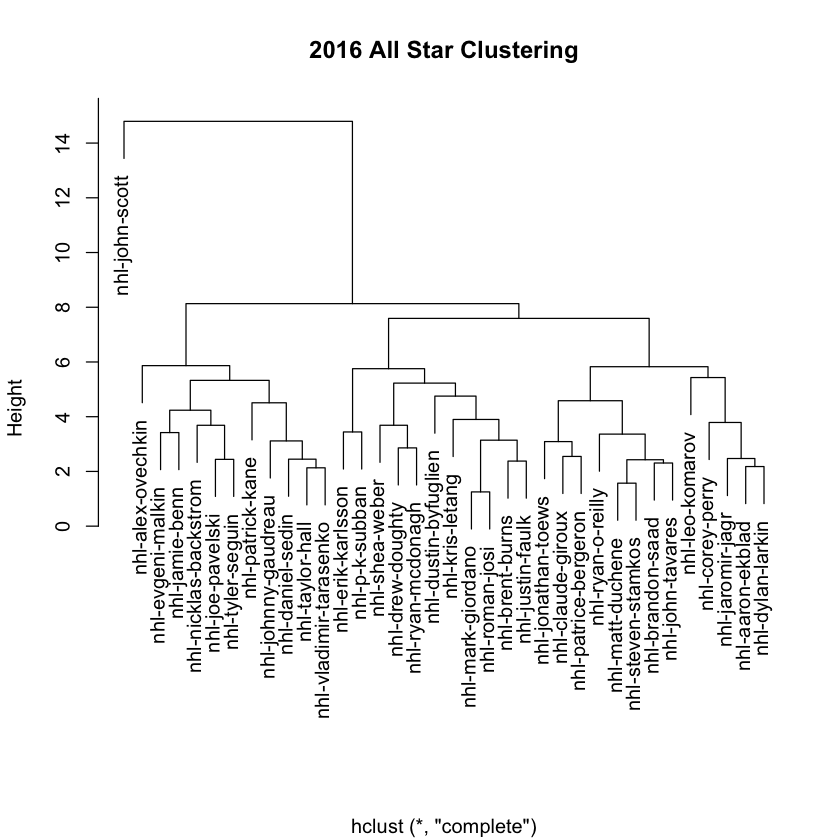

In [104]:
## plot
plot(star_clust, labels=row.names(star_stats), main="2016 All Star Clustering", xlab="")

In [105]:
## get Johnny Hockey
ss_get_result(ep="players", query=list(player_id="nhl-johnny-gaudreau"))

[1] "Making initial API request"


ERROR: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[1]]) result is length 0


[[1]]
[[1]]$leagues
                                    id                created_at
1 48803e9e-c4ec-414a-a85d-9abfa6e9cfd9 2015-11-28T22:33:56-05:00
                 updated_at abbreviation color minutes_per_period
1 2015-11-28T22:33:56-05:00          NHL    NA                 NA
                    name periods slug  sport
1 National Hockey League      NA  nhl hockey

[[1]]$playing_positions
                                    id                created_at
1 4329a9bc-8f07-4c48-8e19-b142678e68c6 2016-01-06T03:17:14-05:00
                 updated_at abbreviation description formation      name
1 2016-01-06T03:17:14-05:00           LW          NA offensive Left Wing
                             league_id
1 48803e9e-c4ec-414a-a85d-9abfa6e9cfd9

[[1]]$teams
                                    id                created_at
1 926ad5ca-c17f-4b20-8b72-9043b6066bc9 2015-11-28T22:33:56-05:00
                 updated_at  color                 colors location    name
1 2016-01-15T10:00:26-05:00 E03A3E E03A3E, FFC758, 000000  Calgary Calgary
  nickname    slug                          division_id
1   Flames nhl-cal 11740eea-c575-44e9-b4f5-a80805703ad0
                             league_id
1 48803e9e-c4ec-414a-a85d-9abfa6e9cfd9

[[1]]$players
                                    id                created_at
1 43337b86-5a4a-4524-8ee7-6291d103f70b 2016-01-06T01:31:46-05:00
                 updated_at active defensive first_name handedness height
1 2016-02-01T21:38:50-05:00   TRUE     FALSE     Johnny       left     69
  unit_of_height last_name            name offensive position_abbreviation
1         inches  Gaudreau Johnny Gaudreau      TRUE                    LW
  position_name salary humanized_salary salary_currency school
1     Left Wing 925000          925,000             USD     NA
                 slug  sport weight unit_of_weight years_of_experience
1 nhl-johnny-gaudreau hockey    157         pounds                   3
                             league_id                  playing_position_id
1 48803e9e-c4ec-414a-a85d-9abfa6e9cfd9 4329a9bc-8f07-4c48-8e19-b142678e68c6
                               team_id
1 926ad5ca-c17f-4b20-8b72-9043b6066bc9